In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
import os
os.chdir('/content/drive/My Drive/Cancer_detection')

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
import os
os.chdir('/content/drive/My Drive/Cancer_detection')

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [10]:
for x, y in training_set:  # Make sure you're using the correct dataset name
    print(f"Images: {x.shape}")
    print(f"Labels: {y.shape}")
    break

Images: (32, 128, 128, 3)
Labels: (32, 9)


In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [21]:
class_names = training_set.class_names
num_classes = len(class_names)
cnn.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

In [22]:
class_names = training_set.class_names
print(f"Class names: {class_names}")
print(f"Number of classes: {len(class_names)}")

Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Number of classes: 9


In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 512)       │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,726,345 (18.03 MB)

 Trainable params: 4,726,345 (18.03 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 460s 6s/step - accuracy: 0.1200 - loss: 2.4497 - val_accuracy: 0.2058 - val_loss: 2.1284
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.1888 - loss: 2.1259 - val_accuracy: 0.2081 - val_loss: 2.0852
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.1729 - loss: 2.1051 - val_accuracy: 0.2170 - val_loss: 2.0449
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.2098 - loss: 2.0647 - val_accuracy: 0.2908 - val_loss: 1.9900
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.2516 - loss: 2.0138 - val_accuracy: 0.3154 - val_loss: 1.9143
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2641 - loss: 1.9794 - val_accuracy: 0.3758 - val_loss: 1.8244
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3138 - loss: 1.9013 - val_accuracy: 0.4183 - val_loss: 1.7882
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3413 - loss: 1.8514 - val_accuracy: 0.4474 - val_

**Model Evaluation**

In [27]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 349ms/step - accuracy: 0.4436 - loss: 1.6240
Training accuracy: 0.4375


In [28]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.4545 - loss: 1.6535
Validation accuracy: 0.4675615131855011


**Saving Model**

In [29]:
cnn.save('Train_Cancer_Disease.keras')

In [30]:
training_history.history #Return Dictionary of history

{'accuracy': [0.1462053507566452,
  0.1830357164144516,
  0.1830357164144516,
  0.2193080335855484,
  0.25,
  0.2806919515132904,
  0.3091517984867096,
  0.3342633843421936,
  0.35546875,
  0.3616071343421936],
 'loss': [2.2611377239227295,
  2.132253885269165,
  2.1018283367156982,
  2.063908815383911,
  2.0153310298919678,
  1.9733587503433228,
  1.909652829170227,
  1.8791569471359253,
  1.8027575016021729,
  1.8105219602584839],
 'val_accuracy': [0.20581655204296112,
  0.20805369317531586,
  0.2170022428035736,
  0.29082775115966797,
  0.3154362440109253,
  0.3758389353752136,
  0.41834452748298645,
  0.44742730259895325,
  0.4317673444747925,
  0.4675615131855011],
 'val_loss': [2.128396987915039,
  2.085151195526123,
  2.044916868209839,
  1.9899721145629883,
  1.9142694473266602,
  1.8243558406829834,
  1.7882124185562134,
  1.7270668745040894,
  1.727612018585205,
  1.6494776010513306]}

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


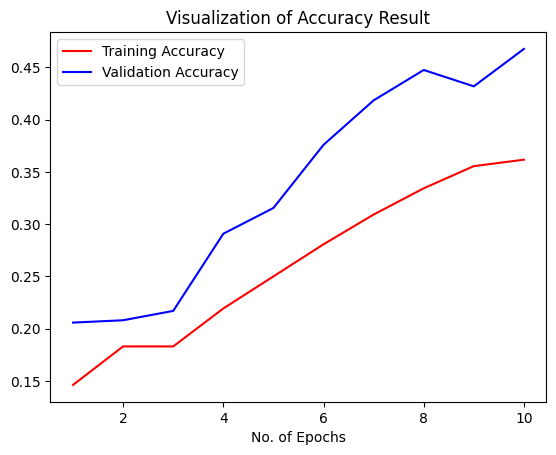

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [35]:
class_name = validation_set.class_names

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 118 files belonging to 9 classes.


In [38]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

118/118 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
Y_true

<tf.Tensor: shape=(118,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8])>

In [41]:
predicted_categories

<tf.Tensor: shape=(118,), dtype=int64, numpy=
array([3, 3, 5, 1, 5, 5, 1, 5, 5, 5, 4, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5,
       5, 1, 1, 5, 1, 3, 1, 5, 1, 5, 3, 3, 5, 4, 3, 3, 4, 1, 5, 5, 1, 5,
       1, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 1, 5, 5, 5, 4, 5, 3, 4, 3, 4, 3,
       4, 4, 4, 5, 4, 4, 3, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 4, 5, 5, 3, 5,
       5, 5, 5, 5, 3, 5, 5, 1, 3, 3, 1, 3, 5, 4, 3, 4, 3, 5, 5, 1, 1, 5,
       5, 5, 5, 5, 1, 5, 1, 1])>

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.33      0.44      0.38        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.11      0.12      0.12        16
                     nevus       0.50      0.69      0.58        16
pigmented benign keratosis       0.21      0.75      0.33        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.27       118
                 macro avg       0.13      0.22      0.16       118
              weighted avg       0.16      0.27      0.19       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 0,  3,  0,  2,  1, 10,  0,  0,  0],
       [ 0,  7,  0,  1,  0,  8,  0,  0,  0],
       [ 0,  3,  0,  4,  2,  7,  0,  0,  0],
       [ 0,  1,  0,  2,  5,  8,  0,  0,  0],
       [ 0,  0,  0,  2, 11,  3,  0,  0,  0],
       [ 0,  1,  0,  2,  1, 12,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  3,  2,  8,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0,  0]])

**Confusion Matrix Evaluation**

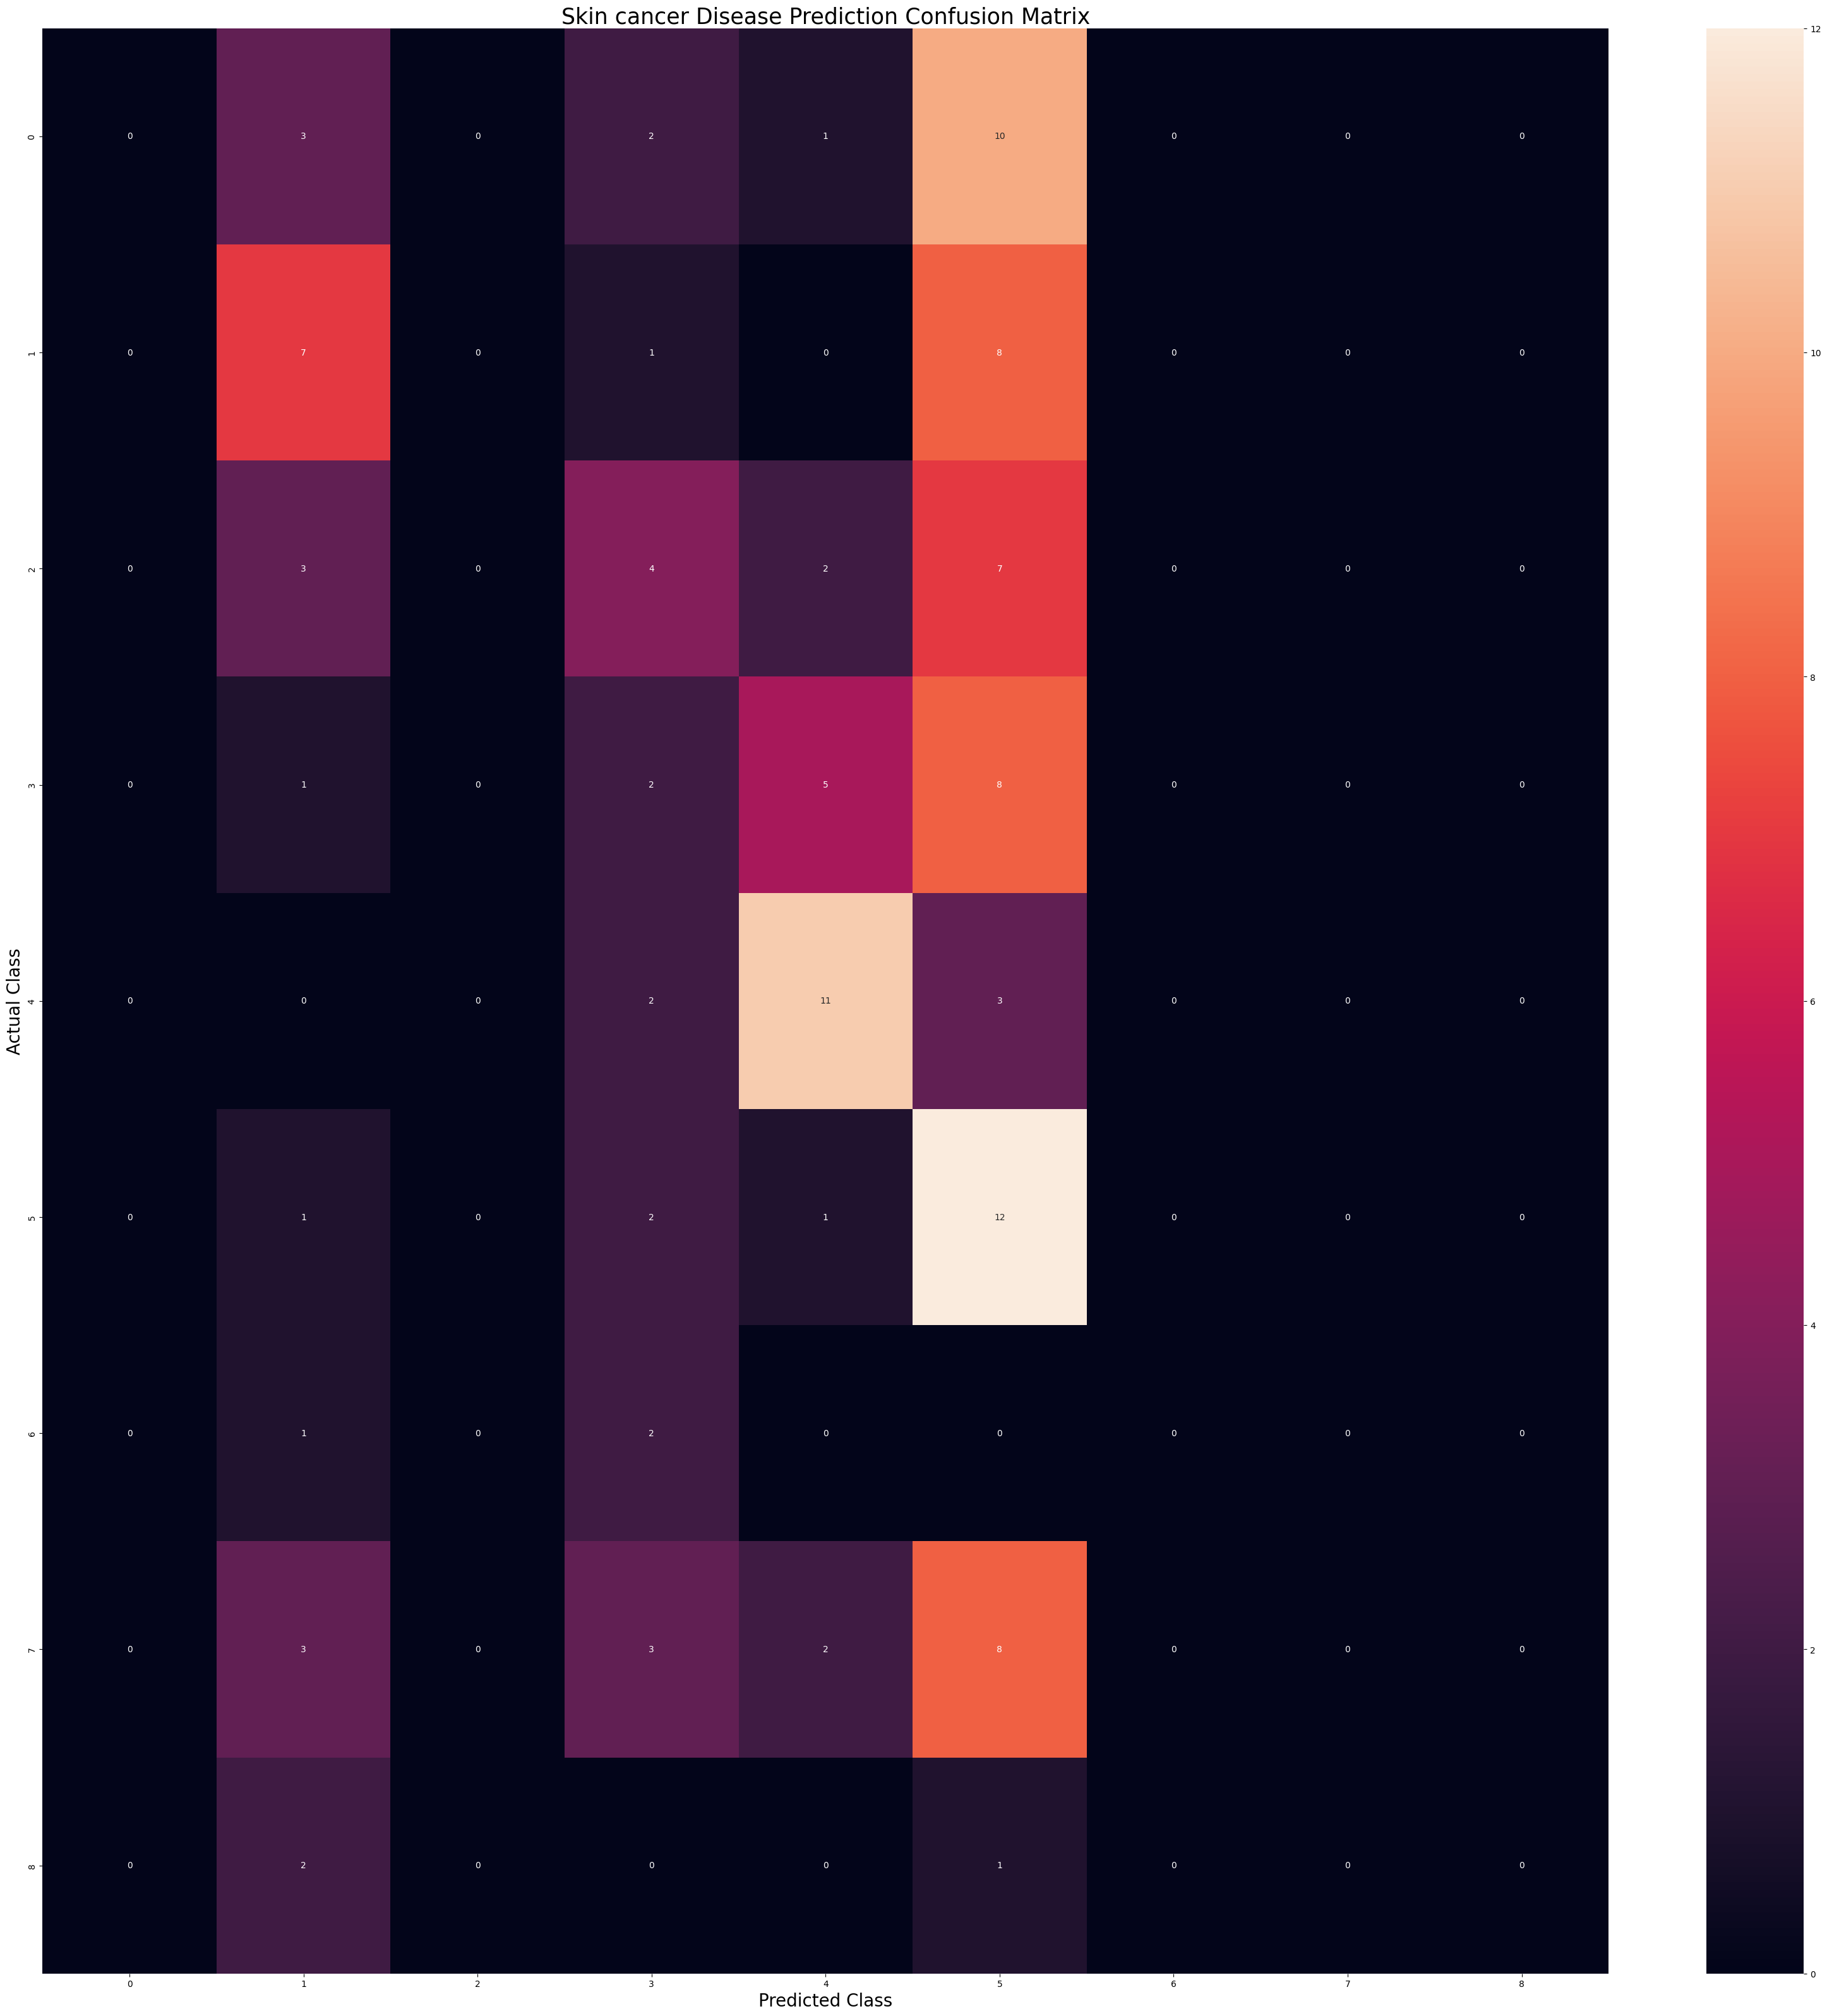

In [46]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Skin cancer Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()